# Week 2 of ML Zoomcamp - regression

## Load the dataset

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 14:20:16--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  2,12MB/s    in 0,6s    

2023-09-25 14:20:17 (2,12 MB/s) - ‘housing.csv’ saved [1423529/1423529]



## Import libraries

In [329]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## EDA

In [346]:
df = pd.read_csv('housing.csv')

In [347]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [348]:
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ', '_')

In [349]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [350]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [351]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5



In [352]:
df.ocean_proximity.unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [357]:
values = ['inland', '<1h_ocean']

In [358]:
new_df = df.loc[df['ocean_proximity'].isin(values)]

In [359]:
new_df['ocean_proximity'].unique()

array(['<1h_ocean', 'inland'], dtype=object)

In [361]:
columns = ['latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income',
            'median_house_value'
            ]

In [366]:
ocean_proximity = new_df['ocean_proximity']

In [367]:
ocean_proximity

701      <1h_ocean
830      <1h_ocean
859      <1h_ocean
860      <1h_ocean
861      <1h_ocean
           ...    
20635       inland
20636       inland
20637       inland
20638       inland
20639       inland
Name: ocean_proximity, Length: 15687, dtype: object

In [368]:
del new_df['ocean_proximity']

In [388]:
new_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

### Question 1. There's one feature with missing values. What is it?
#### Answer: total_bedrooms

In [371]:
new_df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

### Question 2. What's the median (50% percentile) for variable 'population'?
#### Answer: 

In [389]:
new_df['population'].median()

1195.0

<Axes: xlabel='median_house_value', ylabel='Count'>

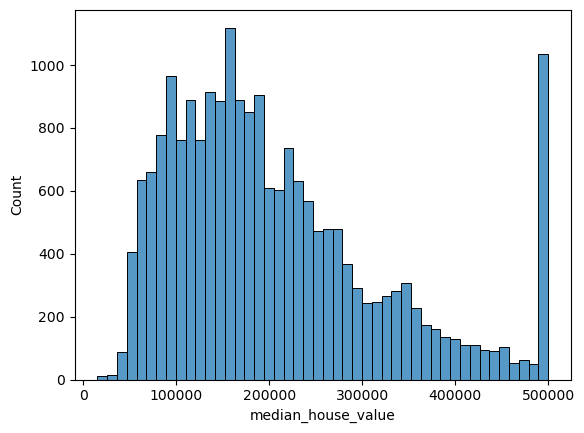

In [360]:
sns.histplot(df.median_house_value)

In [23]:
df['ocean_proximity'].value_counts()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

In [32]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [33]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Setting up the validation framework

In [390]:
n = len(new_df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [391]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [392]:
idx = np.arange(n)

In [393]:
np.random.shuffle(idx)
np.random.seed(42)

In [396]:
df_train = new_df.iloc[idx[:n_train]]
df_val = new_df.iloc[idx[n_train:n_train+n_val]]
df_test = new_df.iloc[n_train+n_val:]

In [397]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


In [398]:
len(df_train), len(df_test), len(df_val)

(9413, 3137, 3137)

In [399]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [400]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [401]:
y_val

array([11.3095968 , 12.27326857, 11.95247633, ..., 12.53968723,
       12.34279083, 11.97477721])

In [403]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [404]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

## Linear regression

$$ G(Xi) = Yi, 
where G is the function, Xi is a feature matrix, Yi is the predicted price of the house

In [273]:
# housing_median_age, total_rooms, total_bedrooms, median_income

$$ X15 = [40.0, 1089.0, 226.0, 2.2727]

In [274]:
def dot(xi, w):
    n = len(xi)

    res = 0.0 

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [275]:
w_new = [w0] + w

In [276]:
w_new

[7.17, 0.01, 0.04, 0.002, 0.001]

In [277]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [278]:
linear_regression(xi)

51.5842727

In [279]:
np.expm1(51.5842727)

2.5279296665740758e+22

In [280]:
np.log1p(2.5279296665740758e+22)

51.5842727

In [281]:
x1 = [1,147,24,1385,88]
x2 = [1,132,25,2031,101]
x10 = [1,453,11,86,44]

x = [x1,x2,x10]

In [282]:
X = np.array(x)

In [283]:
X

array([[   1,  147,   24, 1385,   88],
       [   1,  132,   25, 2031,  101],
       [   1,  453,   11,   86,   44]])

In [284]:
X.shape

(3, 5)

In [285]:
def linear_regression(X):
    return X.dot(w_new)

In [286]:
linear_regression(X)

array([12.458, 13.653, 12.356])

## Train linear regression

In [287]:
X = [
    [147,24,1385,88],
    [132,25,2031,101],
    [453,11,86,44],
    [34,24,1385,99],
    [344,25,2031,101],
    [899,11,86,44],
    [128,24,1385,76],
    [132,36,2031,101],
    [453,14,86,44]
]

In [288]:
X = np.array(X)

In [289]:
X

array([[ 147,   24, 1385,   88],
       [ 132,   25, 2031,  101],
       [ 453,   11,   86,   44],
       [  34,   24, 1385,   99],
       [ 344,   25, 2031,  101],
       [ 899,   11,   86,   44],
       [ 128,   24, 1385,   76],
       [ 132,   36, 2031,  101],
       [ 453,   14,   86,   44]])

In [290]:
y = [100,200,150,250,175,166,290,200,450]

In [291]:
y = np.array(y)

In [292]:
y

array([100, 200, 150, 250, 175, 166, 290, 200, 450])

In [409]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [294]:
train_linear_regression(X,y)

(494.71146176685465,
 array([-2.05637535e-01,  4.33560713e+00,  5.45002182e-04, -3.95199336e+00]))

## House price baseline model

In [451]:
df_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [452]:
df_train.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [453]:
mean_bedrooms = df['total_bedrooms'].mean()

In [454]:
mean_bedrooms

537.8705525375618

In [455]:
X_train = df_train.fillna(mean_bedrooms).values

In [456]:
len(X_train)

9413

In [457]:
len(y_train)

9413

In [458]:
w0, w = train_linear_regression(X_train,y_train)

In [459]:
y_pred = w0 + X_train.dot(w)

In [460]:
y_pred

array([11.48146992, 12.14204297, 12.4514835 , ..., 12.91398898,
       11.93470957, 12.11281938])

<Axes: ylabel='Count'>

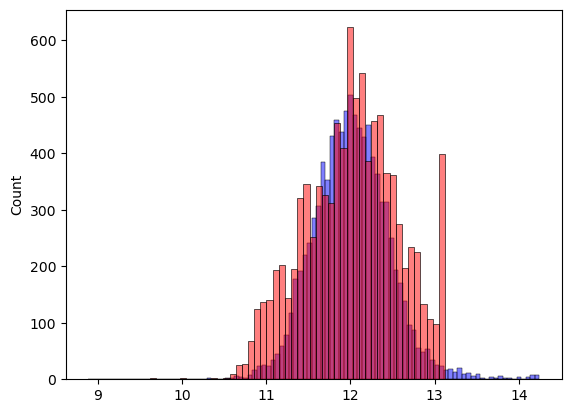

In [461]:
sns.histplot(y_pred, color='blue', alpha=0.5)
sns.histplot(y_train, color='red', alpha=0.5)

## RMSE

In [462]:
def rmse(y, y_pred):
    error= y - y_pred 
    se = error ** 2 
    mse = se.mean()
    return round(np.sqrt(mse), 2)

In [463]:
rmse(y_train,y_pred)

0.34

## Validating the model

In [468]:
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [469]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)

In [470]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [471]:
rmse(y_val, y_pred)

0.34

## Simple feature engineering